In [481]:
import urllib.request 
import urllib.parse
import urllib.error
import ssl
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as BS
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [479]:
f = pd.read_csv("Bay_Area_Housing_Dataset.csv")
df = pd.DataFrame(f, index=range(353,457))

In [480]:
df.to_csv("MyProjectEx.csv", header = True, index = False)
df = pd.read_csv("MyProjectEx.csv")
df

,Price,Built_Year,Apt_Type,Heating,Cooling,Parking,Address,Bedrooms,Bath_Spaces,Area,Zestimate,zip_code,city
0,558000,1987,Condo,Forced air,Central,1 space,"2958 Flint St # 98, Union City, CA 94587",2,2.0,919,544554,94587,Union City
1,958000,1990,Single Family,Forced air,None,2 spaces,"4710 Andrea Way, Union City, CA 94587",3,3.0,1472,969586,94587,Union City
2,1335000,1997,Single Family,Forced air,None,2 spaces,"31358 Cape View Dr, Union City, CA 94587",4,3.0,2415,1355227,94587,Union City
3,950000,1984,Single Family,Forced air,None,Attached Garage,"4500 Oakdale St, Union City, CA 94587",3,2.0,1630,969373,94587,Union City
4,599000,1985,Townhouse,Forced air,Central,Carport,"241 Galano Plz, Union City, CA 94587",3,2.0,1135,607198,94587,Union City
5,520000,1987,Condo,Other,None,Carport,"3029 Risdon Dr # 14, Union City, CA 94587",1,1.0,821,520004,94587,Union City
6,1148000,1999,Single Family,Forced air,Central,Attached Garage,"105 Cascades Cir, Union City, CA 94587",5,4.0,2320,1158883,94587,Union City
7,950000,1964,Single Family,Forced air,Central,2 spaces,"33803 Washington Ave, Union City, CA 94587",4,2.0,1740,976550,94587,Union City
8,1175000,2002,Single Family,Forced air,Central,2 spaces,"34495 Jasmine Ct, Union City, CA 94587",5,3.0,2257,1191745,94587,Union City
9,879000,1971,Single Family,Forced air,None,2 spaces,"32230 Coronation Dr, Union City, CA 94587",4,2.0,1684,898649,94587,Union City


# Finding Mean, Max and Mean of Price and Zestimate per City

In [451]:

df1 = df.iloc[:,:1][df.city=='Union City']
df1


,Price
0,558000
1,958000
2,1335000
3,950000
4,599000
5,520000
6,1148000
7,950000
8,1175000
9,879000


In [452]:

df11 = df.iloc[:,10:11][df.city=='Union City']
df11


,Zestimate
0,544554
1,969586
2,1355227
3,969373
4,607198
5,520004
6,1158883
7,976550
8,1191745
9,898649


In [454]:

df2 = df.iloc[:,:1][df.city=='San Ramon']
df2


,Price
30,1199000
31,999900
32,365000
33,785000
34,1899800
35,890000
36,1370000
37,1049900
38,1145000
39,618000


In [109]:

df22 = df.iloc[:,10:11][df.city=='San Ramon']
df22


,Zestimate
30,1181004
31,962737
32,368864
33,768651
34,1764743
35,915132
36,1026785
37,1169074
38,1111188
39,592739


In [455]:

df3 = df.iloc[:,:1][df.city=='San Mateo']
df3


,Price
66,898000
67,1800000
68,848000
69,3799000
70,1465000
71,1099000
72,680000
73,1369000
74,928000
75,499000


In [456]:

df33 = df.iloc[:,10:11][df.city=='San Mateo']
df33



,Zestimate
66,939952
67,1926101
68,911831
69,3548022
70,1476581
71,1126239
72,693631
73,1475559
74,958907
75,515618


In [457]:
a2 = int(df1.mean())
b2 = int(df2.mean())
c2 = int(df3.mean())

a1 = int(df1.min())
b1 = int(df2.min())
c1 = int(df3.min())

a3 = int(df1.max())
b3 = int(df2.max())
c3 = int(df3.max())


a2z = int(df11.mean())
b2z = int(df22.mean())
c2z = int(df33.mean())

a1z = int(df11.min())
b1z = int(df22.min())
c1z = int(df33.min())

a3z = int(df11.max())
b3z = int(df22.max())
c3z = int(df33.max())

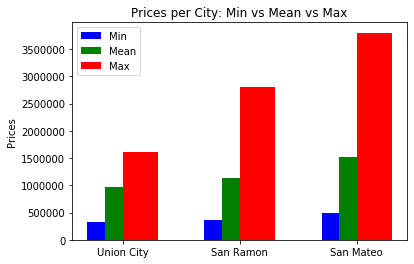

In [458]:
x = ['Union City','San Ramon', 'San Mateo']
y = [a1, b1, c1]
z = [a2, b2, c2]
zz = [a3,b3,c3]

ax = plt.subplot()

ax.bar(x, y, width = -0.3, color='b', align='edge', label = 'Min')
ax.bar(x, z, width = 0.3,color='g', align='center', label = 'Mean')
ax.bar(x,zz, width=0.3,color='r', align = 'edge', label = 'Max')

plt.ylabel('Prices')
plt.title('Prices per City: Min vs Mean vs Max')

plt. legend()
plt.show()

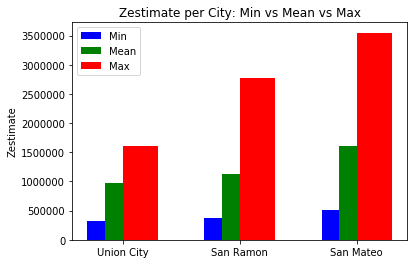

In [459]:

xze = ['Union City','San Ramon', 'San Mateo']
yze = [a1z, b1z, c1z]
zze = [a2z, b2z, c2z]
zzze = [a3z,b3z,c3z]

ax = plt.subplot()
ax.bar(xze, yze, width = -0.3, color='b', align='edge', label = 'Min')
ax.bar(xze, zze, width = 0.3, color='g', align='center', label = "Mean")
ax.bar(xze,zzze, width = 0.3,color='r', align = 'edge', label = 'Max')

plt.ylabel('Zestimate')
plt.title('Zestimate per City: Min vs Mean vs Max')
plt.legend()
plt.show()

# # APT Types in Cities

In [460]:
####Start of apt vs year
U_apt_year = df.iloc[:,2][df.city=='Union City']
U_apt_year

SR_apt_year = df.iloc[:,2][df.city=='San Ramon']
SR_apt_year

SM_apt_year = df.iloc[:,2][df.city=='San Mateo']
SM_apt_year

66             Condo
67     Single Family
68             Condo
69     Single Family
70             Condo
71     Single Family
72             Condo
73     Single Family
74             Condo
75             Condo
76     Single Family
77     Single Family
78         Townhouse
79         Townhouse
80     Single Family
81     Single Family
82             Condo
83             Condo
84     Single Family
85     Single Family
86             Condo
87     Single Family
88         Townhouse
89     Single Family
90     Single Family
91         Townhouse
92     Single Family
93     Single Family
94     Single Family
95     Single Family
96     Single Family
97     Single Family
98             Condo
99     Single Family
100    Single Family
101    Single Family
102    Single Family
103        Townhouse
Name: Apt_Type, dtype: object

In [461]:
SM_apt_year 
SMC = 0
SMS= 0
SMT = 0
SMM = 0
SMMM = 0
for p in SM_apt_year:
    if p == 'Condo':
        SMC = SMC+1
    if p == "Single Family":
        SMS = SMS + 1
    if p == "Townhouse":
        SMT = SMT + 1 
    if p == "Multi Family":
        SMM = SMM +1
    if p == "Mobile / Manufactured":
        SMMM = SMMM+1
        



In [463]:
U_apt_year 
UC = 0
US= 0
UT = 0
UM = 0
UMM = 0
for p in U_apt_year:
    if p == 'Condo':
        UC = UC+1
    if p == "Single Family":
        US = US + 1
    if p == "Townhouse":
        UT = UT + 1 
    if p == "Multi Family":
        UM = UM +1
    if p == "Mobile / Manufactured":
        UMM = UMM+1
        

In [464]:
SR_apt_year 
SRC = 0
SRS= 0
SRT = 0
SRM = 0
SRMM = 0
for p in SR_apt_year:
    if p == 'Condo':
        SRC = SRC+1
    if p == "Single Family":
        SRS = SRS + 1
    if p == "Townhouse":
        SRT = SRT + 1 
    if p == "Multi Family":
        SRM = SRM +1
    if p == "Mobile / Manufactured":
        SRMM = SRMM+1

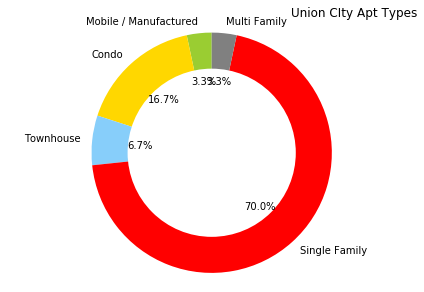

In [465]:
##U Pie
labels = "Mobile / Manufactured", "Condo", "Townhouse","Single Family", "Multi Family"
sizes = [UMM, UC, UT, US, UM]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'red', 'grey']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.title("Union CIty Apt Types", loc = 'right' )
plt.show()

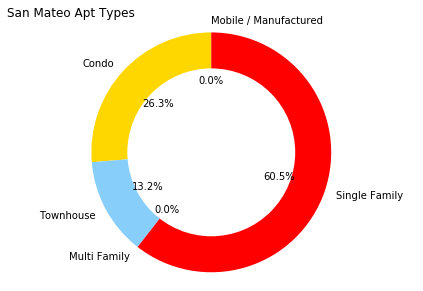

In [466]:
##SM Pie
labels = "Mobile / Manufactured", "Condo", "Townhouse", "Multi Family", "Single Family"
sizes = [SMMM, SMC, SMT, SMM, SMS]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'grey', 'red']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.title("San Mateo Apt Types", loc = 'left' )
plt.show()

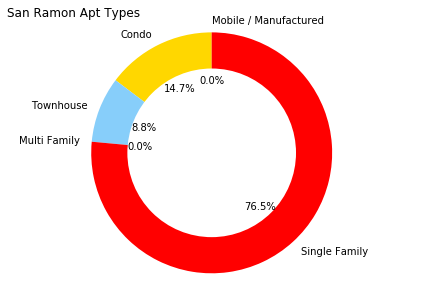

In [467]:
##SR Pie
labels = "Mobile / Manufactured", "Condo", "Townhouse", "Multi Family", "Single Family"
sizes = [SRMM, SRC, SRT, SRM, SRS]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'grey', 'red']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.title("San Ramon Apt Types", loc = 'left' )
plt.show()

# Heating and Cooling available in different Cities

In [468]:
U_heat_cool = df.iloc[:,3:5][df.city=='Union City']
U_heat_cool

SM_heat_cool = df.iloc[:,3:5][df.city=='San Mateo']
SM_heat_cool

SR_heat_cool = df.iloc[:,3:5][df.city=='San Ramon']
SR_heat_cool

,Heating,Cooling
30,Forced air,Central
31,Forced air,Central
32,None,Other
33,Forced air,Central
34,Forced air,Central
35,Forced air,Central
36,Forced air,Central
37,Forced air,Central
38,Forced air,Central
39,None,Other


In [469]:

U_heat_cool
U_heat = U_heat_cool.iloc[:,:1]
U_heat

U_cool = U_heat_cool.iloc[:,1:2]
U_cool

SR_heat_cool
SR_heat = SR_heat_cool.iloc[:,:1]
SR_heat

SR_cool = SR_heat_cool.iloc[:,1:2]
SR_cool

SM_heat_cool
SM_heat = SM_heat_cool.iloc[:,:1]
SM_heat

SM_cool = SM_heat_cool.iloc[:,1:2]
SM_cool



,Cooling
66,None
67,Central
68,Other
69,Central
70,Central
71,None
72,None
73,None
74,Other
75,None


In [471]:
#U_heat = U_heat.to_string(index = False)
UHF = 0
UHO= 0
UHN = 0
for p in U_heat["Heating"]:
    if p == "Forced air":
        UHF = UHF+1
    if p == "Other":
        UHO = UHO + 1
    if p == "None":
        UHN = UHN + 1 
        
UCC = 0
UCO= 0
UCN = 0
for p in U_cool["Cooling"]:
    if p == 'Central':
        UCC = UCC+1
    if p == "Other":
        UCO = UCO + 1
    if p == "None":
        UCN = UCN + 1 
        



In [472]:
SMHF = 0
SMHO= 0
SMHN = 0
for p in SM_heat["Heating"]:
    if p == 'Forced air':
        SMHF = SMHF+1
    if p == "Other":
        SMHO = SMHO + 1
    if p == "None":
        SMHN = SMHN + 1 
        
SMCC = 0
SMCO= 0
SMCN = 0
for p in SM_cool["Cooling"]:
    if p == 'Central':
        SMCC = SMCC+1
    if p == "Other":
        SMCO = SMCO + 1
    if p == "None":
        SMCN = SMCN + 1 

In [473]:
SRHF = 0
SRHO= 0
SRHN = 0
for p in SR_heat["Heating"]:
    if p == 'Forced air':
        SRHF = SRHF+1
    if p == "Other":
        SRHO = SRHO + 1
    if p == "None":
        SRHN = SRHN + 1 
        
SRCC = 0
SRCO= 0
SRCN = 0
for p in SR_cool["Cooling"]:
    if p == 'Central':
        SRCC = SRCC+1
    if p == "Other":
        SRCO = SRCO + 1
    if p == "None":
        SRCN = SRCN + 1 

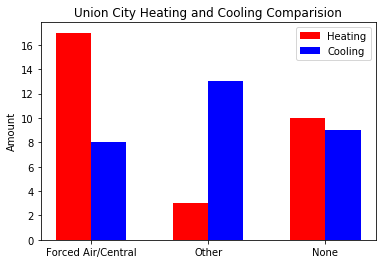

In [474]:
uhc = ['Forced Air/Central','Other', 'None']
uhc1 = [UHF, UHO, UHN]
uhc2 = [UCC, UCO, UCN]

ax = plt.subplot()
ax.bar(uhc, uhc1, width = -0.3, color='r', align='edge', label = 'Heating')
ax.bar(uhc, uhc2, width = 0.3, color='b', align='edge', label = "Cooling")


plt.ylabel('Amount')
plt.title('Union City Heating and Cooling Comparision')
plt.legend()
plt.show()

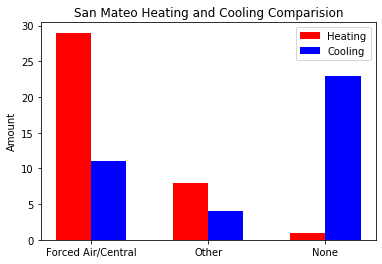

In [475]:
SMhc = ['Forced Air/Central','Other', 'None']
SMhc1 = [SMHF, SMHO, SMHN]
SMhc2 = [SMCC, SMCO, SMCN]


ax = plt.subplot()
ax.bar(SMhc, SMhc1, width = -0.3, color='r', align='edge', label = 'Heating')
ax.bar(SMhc, SMhc2, width = 0.3, color='b', align='edge', label = "Cooling")

plt.ylabel('Amount')
plt.title('San Mateo Heating and Cooling Comparision')
plt.legend()
plt.show()

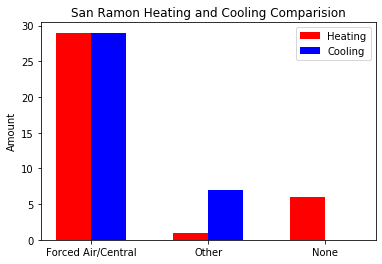

In [477]:
SRhc = ['Forced Air/Central','Other', 'None']
SRhc1 = [SRHF, SRHO, SRHN]
SRhc2 = [SRCC, SRCO, SRCN]


ax = plt.subplot()
ax.bar(SRhc, SRhc1, width = -0.3, color='r', align='edge', label = 'Heating')
ax.bar(SRhc, SRhc2, width = 0.3, color='b', align='edge', label = "Cooling")


plt.ylabel('Amount')
plt.title('San Ramon Heating and Cooling Comparision')
plt.legend()
plt.show()